In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
feedback = pd.read_csv("processed_feedback.csv")

In [3]:
feedback = feedback.drop([0])

In [4]:
feedback

,id,model,authors,citations,title,abstract,recommendation,confidence,score,comment
1,2,graph-attention-network,NaN,[],More is not Always BetterThe Negative Impact o...,RDF2vec is an embedding technique for represen...,"['European Semantic Web Symposium,Internationa...","[0.18, 0.15, 0.06, 0.06, 0.05, 0.04, 0.03, 0.0...",5,NaN
2,3,authors,"['Paulheim Heiko', 'Iana Andreea']",NaN,NaN,NaN,"['European Semantic Web Symposium,Internationa...","[5.0, 3.0, 2.0, 1.0, 1.0, 1.0]",3,NaN
3,4,graph-attention-network,NaN,[],"We introduce S EAGLE 1 , a platform for com-\n...","We introduce SEAGLE, a platform for comparativ...",['International Conference of the Cross-Langua...,"[0.43, 0.14, 0.05, 0.04, 0.03, 0.02, 0.02, 0.0...",5,NaN
4,5,graph-attention-network,NaN,[],The Knowledge Graph Track at OAEI - Gold Stand...,The Ontology Alignment Evaluation Initiative (...,['International Workshop of the Initiative for...,"[0.47, 0.4, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01...",4,first and second does not fit (even with high ...
5,6,graph-attention-network-with-authors,"['Hertling Sven, Paulheim Heiko']","['Authors: Hertling Sven, Paulheim Heiko']",The Knowledge Graph Track at OAEI - Gold Stand...,The Ontology Alignment Evaluation Initiative (...,['International Workshop of the Initiative for...,"[0.76, 0.16, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",3,"good: 3,6,7,8"
6,7,heterogeneous-graph-attention-network,['fink manuel'],['Authors: fink manuel'],Reinforced Anytime Bottom Up Rule Learning for...,Most of today’s work on knowledge graph comple...,['International Conference on Inductive Logic ...,"[0.57, 0.1, 0.04, 0.02, 0.02, 0.01, 0.01, 0.01...",3,The confidence scores drop too sharply after t...
7,8,graph-attention-network-with-authors,['fink manuel'],['Authors: fink manuel'],Reinforced Anytime Bottom Up Rule Learning for...,Most of today’s work on knowledge graph comple...,['International Conference on Inductive Logic ...,"[0.34, 0.12, 0.05, 0.05, 0.03, 0.03, 0.02, 0.0...",2,Not sure how to rate these recommendations com...
8,9,graph-attention-network,NaN,[],Reinforced Anytime Bottom Up Rule Learning for...,Most of today’s work on knowledge graph comple...,['International Conference on Inductive Logic ...,"[0.29, 0.12, 0.05, 0.04, 0.03, 0.03, 0.03, 0.0...",2,Feedback is basically identical to GAN with au...
9,10,authors,['meilicke christian'],NaN,NaN,NaN,"['European Semantic Web Symposium,Internationa...","[5.0, 3.0, 1.0, 1.0, 1.0, 1.0]",2,Too focused on the author's history and sugges...
10,11,heterogeneous-graph-attention-network,['fink manuel'],['Authors: fink manuel'],Explaining Differences Between Unaligned Table...,We study the problem of explaining differences...,"['European Working Session on Learning,Worksho...","[0.19, 0.15, 0.08, 0.03, 0.03, 0.02, 0.02, 0.0...",2,Rank 3 and 4 are actually really impressive su...


In [5]:
scores_authors = list(feedback[feedback.model=="authors"].score)
scores_gat = list(feedback[feedback.model=="graph-attention-network"].score)
scores_gat_authors = list(feedback[feedback.model=="graph-attention-network-with-authors"].score)
scores_han = list(feedback[feedback.model=="heterogeneous-graph-attention-network"].score)

In [6]:
print("Feedback per model:\n\tAuthors: {}\n\tGAT: {}\n\tGAT (with authors): {}\n\tHAN: {}".format(
    len(scores_authors), len(scores_gat), len(scores_gat_authors), len(scores_han)))

Feedback per model:
	Authors: 16
	GAT: 25
	GAT (with authors): 22
	HAN: 21


In [7]:
overall_rating = (sum(scores_gat)/len(scores_gat) + sum(scores_gat_authors)/len(scores_gat_authors) 
                  + sum(scores_han)/len(scores_han))/3
print("Overall rating: {}".format(overall_rating))

Overall rating: 3.6624531024531026


In [8]:
print("Average score per model")
feedback.groupby("model")["score"].mean()

Average score per model


model
authors                                  2.750000
graph-attention-network                  3.680000
graph-attention-network-with-authors     3.545455
heterogeneous-graph-attention-network    3.761905
Name: score, dtype: float64

In [9]:
print("Median score per model")
feedback.groupby("model")["score"].median()

Median score per model


model
authors                                  3.0
graph-attention-network                  4.0
graph-attention-network-with-authors     3.5
heterogeneous-graph-attention-network    4.0
Name: score, dtype: float64

In [10]:
print("Min score per model")
feedback.groupby("model")["score"].min()

Min score per model


model
authors                                  1
graph-attention-network                  2
graph-attention-network-with-authors     1
heterogeneous-graph-attention-network    2
Name: score, dtype: int64

In [11]:
print("Max score per model")
feedback.groupby("model")["score"].max()

Max score per model


model
authors                                  4
graph-attention-network                  5
graph-attention-network-with-authors     5
heterogeneous-graph-attention-network    5
Name: score, dtype: int64

In [12]:
models = ['authors', 'graph-attention-network',
          'graph-attention-network-with-authors', 'heterogeneous-graph-attention-network']
labels = ["Very Bad", "Bad", "Satisfactory", "Good", "Very Good"]
scores_authors = list(feedback[feedback.model=="authors"]["score"].value_counts(sort=False)) + [0]
scores_gat = [0] + list(feedback[feedback.model=="graph-attention-network"]["score"].value_counts(sort=False))
scores_gat_authors = list(feedback[feedback.model=="graph-attention-network-with-authors"]["score"].value_counts(sort=False))
scores_han = [0] + list(feedback[feedback.model=="heterogeneous-graph-attention-network"]["score"].value_counts(sort=False))

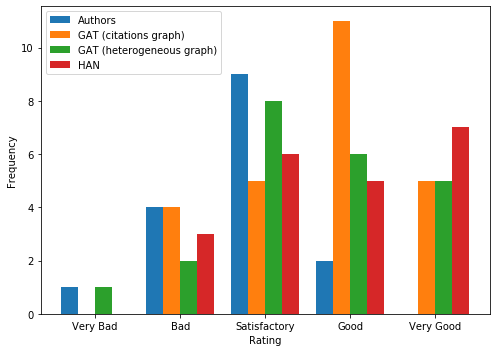

In [13]:
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(7, 5))
authors = ax.bar(x, scores_authors, width, label="Authors", align='center')
gat = ax.bar(x + width, scores_gat, width, label="GAT (citations graph)", align='center')
gat_authors = ax.bar(x + 2*width, scores_gat_authors, width, label="GAT (heterogeneous graph)", align='center')
han = ax.bar(x + 3*width, scores_han, width, label="HAN", align='center')

ax.set_ylabel("Frequency")
ax.set_xlabel("Rating")
ax.set_xticks(x + width + width/2)
ax.set_xticklabels(labels)
ax.legend(loc="upper left")
fig.tight_layout()
plt.show()